# <center>Dragon Ball Data Analysis</center>

### Modules

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Initializing the dataframe

In [2]:
df = pd.read_csv('dragon_ball.csv')
df.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball


## Analyzing Z-series

In [6]:
filtered_df = df[(df['Character'].str.contains('\(') == False) & 
            (df['Character'].str.contains("\'") == False)]

z_series = filtered_df[filtered_df['Dragon_Ball_Series'] == 'Dragon Ball Z']
z_series

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
117,Raditz,"1,200",Saiyan Saga,Dragon Ball Z
118,Gohan,1,Saiyan Saga,Dragon Ball Z
121,Krillin,206,Saiyan Saga,Dragon Ball Z
122,Bulma,1.5,Saiyan Saga,Dragon Ball Z
123,Roshi,139,Saiyan Saga,Dragon Ball Z
125,Piccolo,408,Saiyan Saga,Dragon Ball Z
126,Goku,416,Saiyan Saga,Dragon Ball Z
132,Tien,250,Saiyan Saga,Dragon Ball Z
133,Chiaotzu,145,Saiyan Saga,Dragon Ball Z
134,Yamcha,177,Saiyan Saga,Dragon Ball Z


#### Working with the anime arcs

In [7]:
arc_list = ['Saiyan Saga', 'Namek Saga', 'Ginyu Force Saga',
       'Captain Ginyu Saga', 'Frieza Saga', 'Trunks Saga', 'Android Saga',
       'Imperfect Cell Saga', 'Perfect Cell Saga',
       'Goku And Gohan in The Hyperbolic Time Chamber', 'Cell Games Saga',
       'Great Saiyaman Saga/World Tournament Saga',
       'Babidi Saga/Majin Buu Saga', 'Fusion Saga', 'Kid Buu Saga',]

z_series = z_series[z_series['Saga_or_Movie'].isin(arc_list)]
z_series['Saga_or_Movie'].unique()
z_series

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
117,Raditz,"1,200",Saiyan Saga,Dragon Ball Z
118,Gohan,1,Saiyan Saga,Dragon Ball Z
121,Krillin,206,Saiyan Saga,Dragon Ball Z
122,Bulma,1.5,Saiyan Saga,Dragon Ball Z
123,Roshi,139,Saiyan Saga,Dragon Ball Z
125,Piccolo,408,Saiyan Saga,Dragon Ball Z
126,Goku,416,Saiyan Saga,Dragon Ball Z
132,Tien,250,Saiyan Saga,Dragon Ball Z
133,Chiaotzu,145,Saiyan Saga,Dragon Ball Z
134,Yamcha,177,Saiyan Saga,Dragon Ball Z


In [11]:
z_series.columns

Index(['Character', 'Power_Level', 'Saga_or_Movie', 'Dragon_Ball_Series'], dtype='object')

#### Number of Characters in each arcs

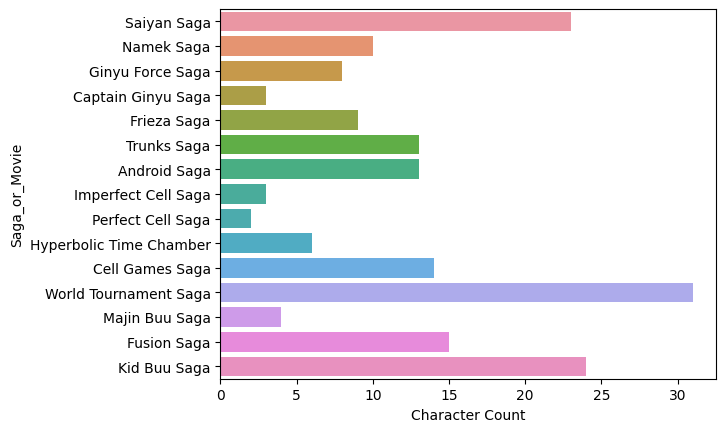

In [43]:
update_condition1 = (z_series['Saga_or_Movie'] == 'Great Saiyaman Saga/World Tournament Saga')
update_condition2 = (z_series['Saga_or_Movie'] == 'Babidi Saga/Majin Buu Saga')
update_condition3 = (z_series['Saga_or_Movie'] == 'Goku And Gohan in The Hyperbolic Time Chamber')

z_series.loc[update_condition1, 'Saga_or_Movie'] = 'World Tournament Saga'
z_series.loc[update_condition2, 'Saga_or_Movie'] = 'Majin Buu Saga'
z_series.loc[update_condition3, 'Saga_or_Movie'] = 'Hyperbolic Time Chamber'
z_series


sns.countplot(data=z_series, y='Saga_or_Movie')
plt.xlabel('Character Count')
plt.show()

World Tournament Saga has the highest number of characters.  
This is perhaps because tournament arcs in general, need to introduce large no. of characters for various battles.

#### Which Character has the highest number of apparence in all the sagas combined?

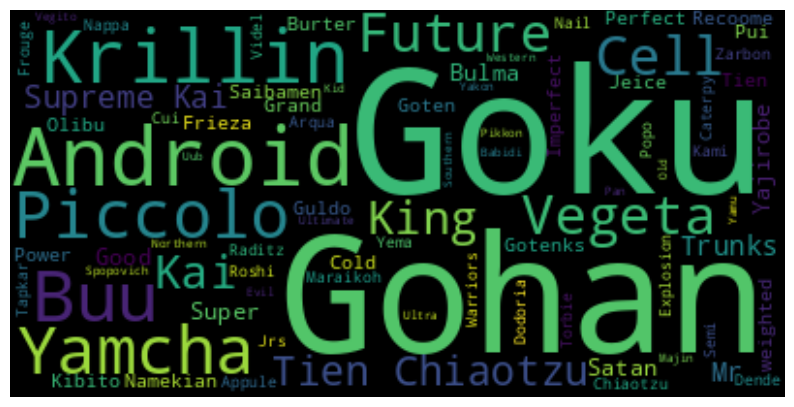

In [96]:
char = " ".join(character for character in z_series['Character'])

plt.figure(figsize=(10, 10))
wc = WordCloud().generate(char) 

plt.imshow(X=wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()